In [1]:
import pandas as pd
import numpy as np
import os
os.chdir(r"C:\Training\AV\Big Mart III")
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
train = pd.read_csv("train_v9rqX0R.csv")
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
train.shape

(8523, 12)

In [4]:
train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [5]:
len(train['Item_Type'].unique())

16

### Does Item Type influence the item sales?

##### ANOVA

In [6]:
type_ols = ols('Item_Outlet_Sales ~ Item_Type', data=train).fit()
table = anova_lm(type_ols, typ=2)
print(table)

                 sum_sq      df         F    PR(>F)
Item_Type  1.176182e+08    15.0  2.700653  0.000388
Residual   2.469965e+10  8507.0       NaN       NaN


Conclusion: Item Sales are affected by Item Type.

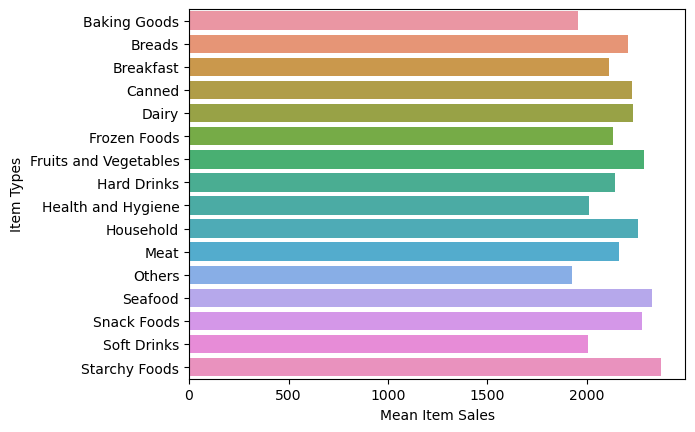

In [7]:
cts = train.groupby('Item_Type')['Item_Outlet_Sales'].mean()
cts1 = cts.reset_index()
sns.barplot(data=cts1, x='Item_Outlet_Sales', y='Item_Type')
plt.xlabel("Mean Item Sales")
plt.ylabel("Item Types")
plt.show()

### Does Outlet Type influence the item sales? 

In [8]:
train['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

##### ANOVA 

In [9]:
type_ols = ols('Item_Outlet_Sales ~ Outlet_Type', data=train).fit()
table = anova_lm(type_ols, typ=2)
print(table)

                   sum_sq      df           F  PR(>F)
Outlet_Type  5.945604e+09     3.0  894.650012     0.0
Residual     1.887166e+10  8519.0         NaN     NaN


Conclusion: Outlet Type does influence item sales.

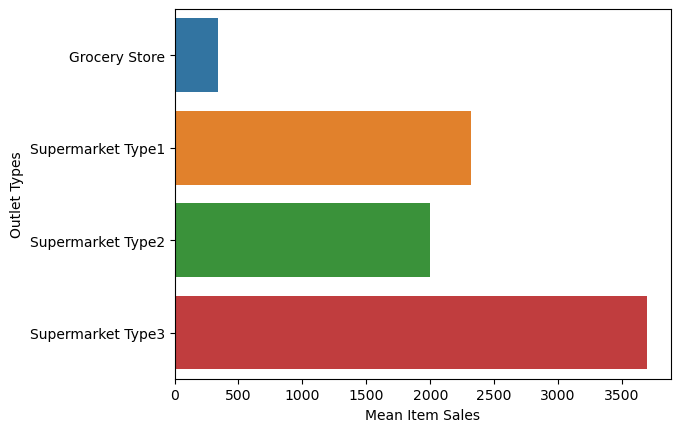

In [10]:
cts = train.groupby('Outlet_Type')['Item_Outlet_Sales'].mean()
cts1 = cts.reset_index()
sns.barplot(data=cts1, x='Item_Outlet_Sales', y='Outlet_Type')
plt.xlabel("Mean Item Sales")
plt.ylabel("Outlet Types")
plt.show()

### Does Fat content affect Sales? 

In [11]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [12]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [13]:
train['Item_Fat_Content'].replace({'low fat':'Low Fat',
                                   'LF':'Low Fat',
                                   'low fat': 'Low Fat',
                                   'reg':'Regular'}, inplace=True)

In [14]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

##### ANOVA 

In [15]:
type_ols = ols('Item_Outlet_Sales ~ Item_Fat_Content', data=train).fit()
table = anova_lm(type_ols, typ=2)
print(table)

                        sum_sq      df         F    PR(>F)
Item_Fat_Content  8.695560e+06     1.0  2.986664  0.083989
Residual          2.480857e+10  8521.0       NaN       NaN


Conclusion: Fat content does not affect sales.

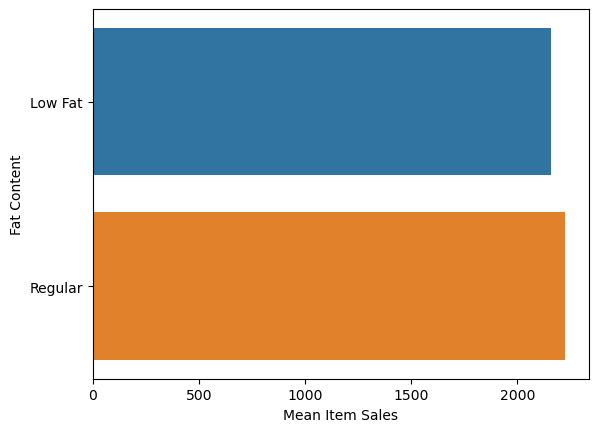

In [16]:
cts = train.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean()
cts1 = cts.reset_index()
sns.barplot(data=cts1, x='Item_Outlet_Sales', y='Item_Fat_Content')
plt.xlabel("Mean Item Sales")
plt.ylabel("Fat Content")
plt.show()

### Does Item Type influence Item MRP?

##### ANOVA 

In [17]:
type_ols = ols('Item_MRP ~ Item_Type', data=train).fit()
table = anova_lm(type_ols, typ=2)
print(table)

                 sum_sq      df         F        PR(>F)
Item_Type  4.121512e+05    15.0  7.161793  6.514365e-16
Residual   3.263773e+07  8507.0       NaN           NaN


Conclusion: Item Type inflences Item MRP.

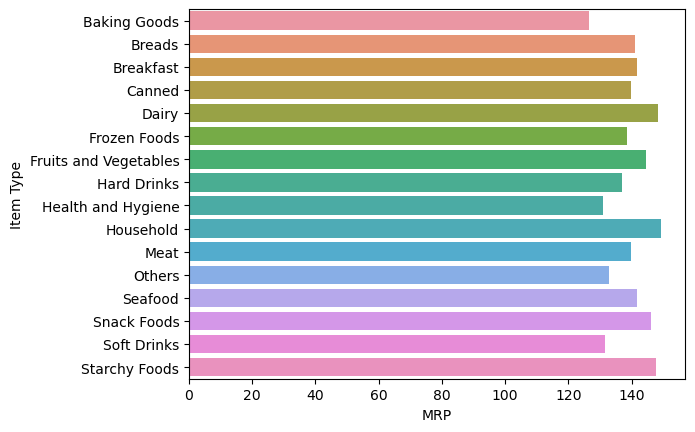

In [18]:
cts = train.groupby('Item_Type')['Item_MRP'].mean()
cts1 = cts.reset_index()
sns.barplot(data=cts1, x='Item_MRP', y='Item_Type')
plt.xlabel("MRP")
plt.ylabel("Item Type")
plt.show()

### Is Fat Content dependent on Item Type? 

##### $\chi^2$ test

In [19]:
ctab = pd.crosstab(train['Item_Fat_Content'], train['Item_Type'])
test_statistic, p_value, df, expected_frequencies = chi2_contingency(ctab)
print(p_value)

0.0


Conclusion: Fat Content and Item Type may be dependent.

### Is Outlet Type dependent on Item Type? 

##### $\chi^2$ test

In [20]:
ctab = pd.crosstab(train['Outlet_Type'], train['Item_Type'])
test_statistic, p_value, df, expected_frequencies = chi2_contingency(ctab)
print(p_value)

0.9989342767300661


Conclusion: Outlet Type and item types may be independent.

### Is Outlet Location Type dependent on Item Type?

##### $\chi^2$ test

In [21]:
ctab = pd.crosstab(train['Outlet_Location_Type'], train['Item_Type'])
test_statistic, p_value, df, expected_frequencies = chi2_contingency(ctab)
print(p_value)

0.9963035075844918


Conclusion: Outlet Location Type and item types may be independent.